# Milestone 1: Data Understanding

Este notebook realiza a análise exploratória inicial dos dados dos candidatos a programas de habitação.

**Objetivos:**
1. Carregar e inspecionar a estrutura dos dados.
2. Verificar a qualidade dos dados (valores nulos, tipos).
3. Analisar estatísticas descritivas (rendimentos, idade, agregado).
4. Visualizar distributions para identificar padrões.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de Estilo
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

## 1. Carregamento dos Dados

In [2]:
# Caminho para o ficheiro (ajustar conforme necessário)
file_path = '../docs/amostrasdesafio0124 (1).xlsx'

try:
    df = pd.read_excel(file_path)
    print("Dados carregados com sucesso!")
    display(df.head())
except FileNotFoundError:
    print(f"Erro: Ficheiro não encontrado em {file_path}")

Dados carregados com sucesso!


,Contexto,Estado,Data Estado,Escalão Etário,Nº Elem. Agregado,Nº Adultos,Concelho,Rendimento Global (IRS e Rend. Isentos)
0,Registo de Adesão,Registado,2023-12-20,Menos 35 anos,1,1,Lisboa,20644.16
1,Registo de Adesão,Registado,2024-11-06,35 a 65 anos,1,1,Amadora,12127.51
2,Registo de Adesão,Registado,2023-02-27,Menos 35 anos,4,1,Lisboa,3939.92
3,Registo de Adesão,Registado,2024-11-07,Menos 35 anos,1,1,Lisboa,21467.20
4,Registo de Adesão,Registado,2023-02-14,Menos 35 anos,1,1,Porto,20391.15


## 2. Visão Geral da Estrutura

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Contexto                                 100 non-null    str           
 1   Estado                                   100 non-null    str           
 2   Data Estado                              100 non-null    datetime64[us]
 3   Escalão Etário                           100 non-null    str           
 4   Nº Elem. Agregado                        100 non-null    int64         
 5   Nº Adultos                               100 non-null    int64         
 6   Concelho                                 100 non-null    str           
 7   Rendimento Global (IRS e Rend. Isentos)  100 non-null    float64       
dtypes: datetime64[us](1), float64(1), int64(2), str(4)
memory usage: 6.4 KB


In [4]:
# Verificar valores nulos
missing = df.isnull().sum()
print("Valores em falta por coluna:")
print(missing[missing > 0])

Valores em falta por coluna:
Series([], dtype: int64)


## 3. Análise Univariada

### 3.1. Distribuição de Rendimentos
Variável chave para determinar a elegibilidade.

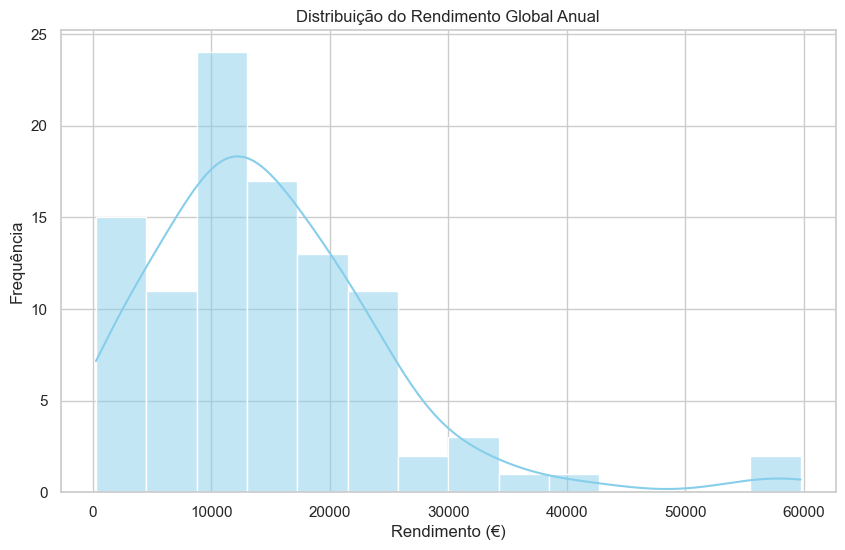

Média: €14730.70
Mediana: €12778.40


In [5]:
col_rendimento = 'Rendimento Global (IRS e Rend. Isentos)'

if col_rendimento in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col_rendimento], kde=True, color='skyblue')
    plt.title('Distribuição do Rendimento Global Anual')
    plt.xlabel('Rendimento (€)')
    plt.ylabel('Frequência')
    plt.show()
    
    print(f"Média: €{df[col_rendimento].mean():.2f}")
    print(f"Mediana: €{df[col_rendimento].median():.2f}")

### 3.2. Distribuição Etária
Importante para programas jovens (Porta 65).

C:\Users\localadmin\AppData\Local\Temp\ipykernel_7920\2874981745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Escalão Etário', data=df, order=df['Escalão Etário'].value_counts().index, palette='viridis')


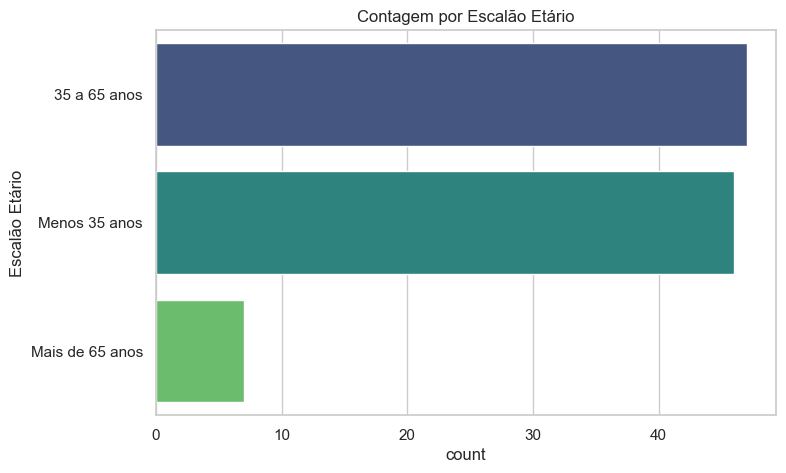

In [6]:
if 'Escalão Etário' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(y='Escalão Etário', data=df, order=df['Escalão Etário'].value_counts().index, palette='viridis')
    plt.title('Contagem por Escalão Etário')
    plt.show()

### 3.3. Dimensão do Agregado Familiar
Define a tipologia adequada (T0, T1, T2...).

C:\Users\localadmin\AppData\Local\Temp\ipykernel_7920\4276661097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Nº Elem. Agregado', data=df, palette='pastel')


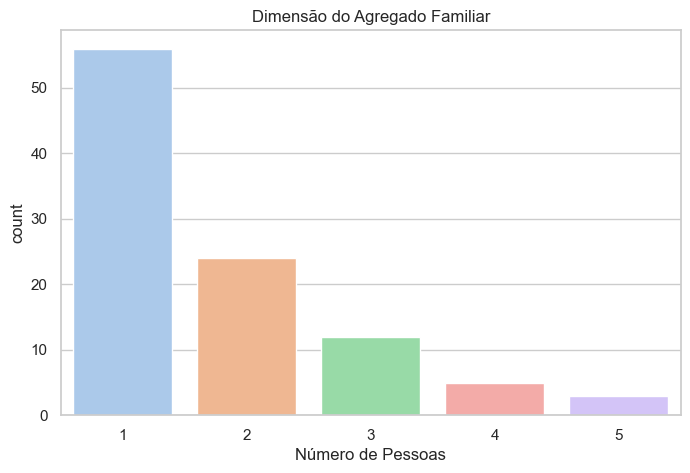

In [7]:
if 'Nº Elem. Agregado' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Nº Elem. Agregado', data=df, palette='pastel')
    plt.title('Dimensão do Agregado Familiar')
    plt.xlabel('Número de Pessoas')
    plt.show()

## 4. Análise Geográfica (Concelho)

C:\Users\localadmin\AppData\Local\Temp\ipykernel_7920\2140681542.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_concelhos.values, y=top_concelhos.index, palette='magma')


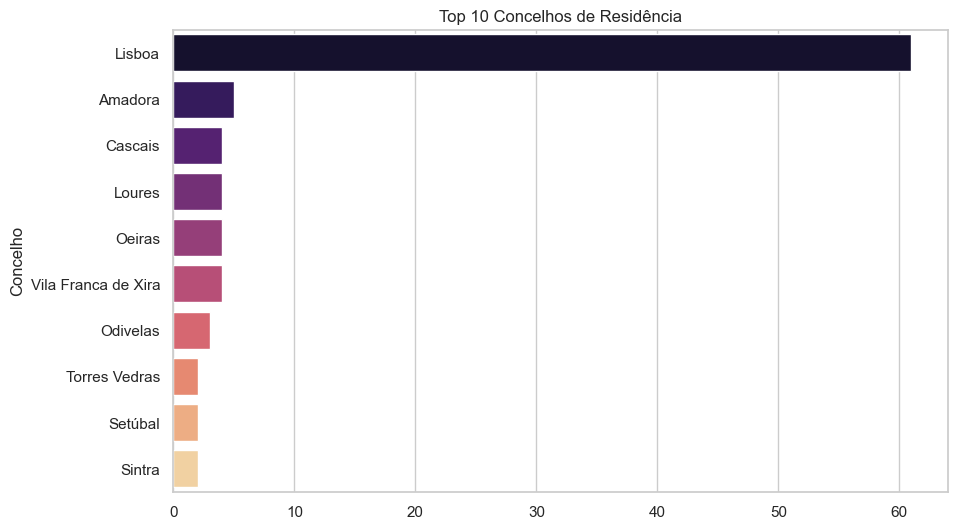

In [8]:
if 'Concelho' in df.columns:
    top_concelhos = df['Concelho'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_concelhos.values, y=top_concelhos.index, palette='magma')
    plt.title('Top 10 Concelhos de Residência')
    plt.show()

## 5. Conclusões Preliminares

- [Preencher com as observações finais]